In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")
df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)

# Exploratory Data Analysis (EDA)

### Target

In [3]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Numeric Vs Target

/tmp/ipykernel_22068/1562438740.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age[df.Survived == 0], color="r", bins=[0,5,12,18,40,120], label="Not Survived")
/tmp/ipykernel_22068/1562438740.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age[df.Survived == 1], color="g", bins=[0

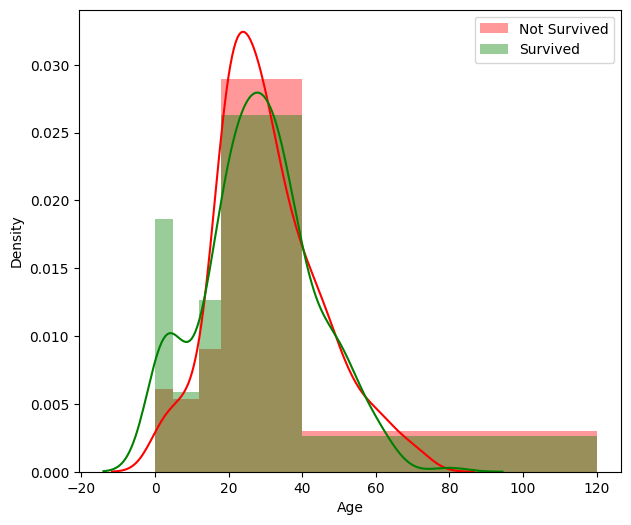

In [4]:
plt.figure(figsize=(7,6))
sns.distplot(df.Age[df.Survived == 0], color="r", bins=[0,5,12,18,40,120], label="Not Survived")
sns.distplot(df.Age[df.Survived == 1], color="g", bins=[0,5,12,18,40,120], label="Survived")
plt.legend()

/tmp/ipykernel_22068/4113035503.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Fare[df.Survived == 0], color="r", bins=25, label="Not Survived")
/tmp/ipykernel_22068/4113035503.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Fare[df.Survived == 1], color="g", bins=25, label="Survi

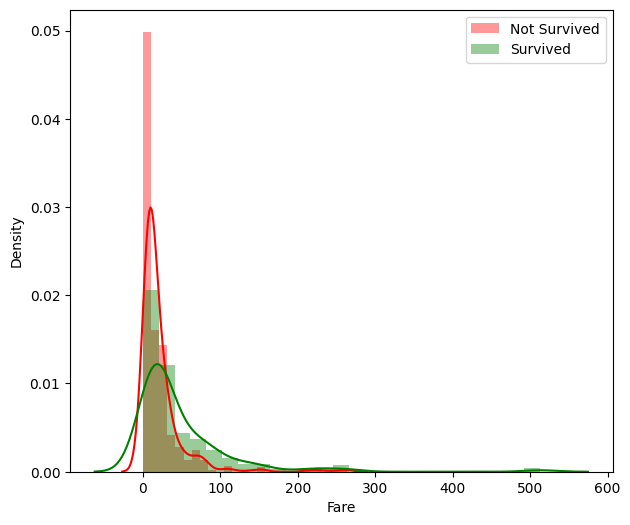

In [5]:
plt.figure(figsize=(7,6))
sns.distplot(df.Fare[df.Survived == 0], color="r", bins=25, label="Not Survived")
sns.distplot(df.Fare[df.Survived == 1], color="g", bins=25, label="Survived")
plt.legend()

### Categoric / Ordinal Vs Target

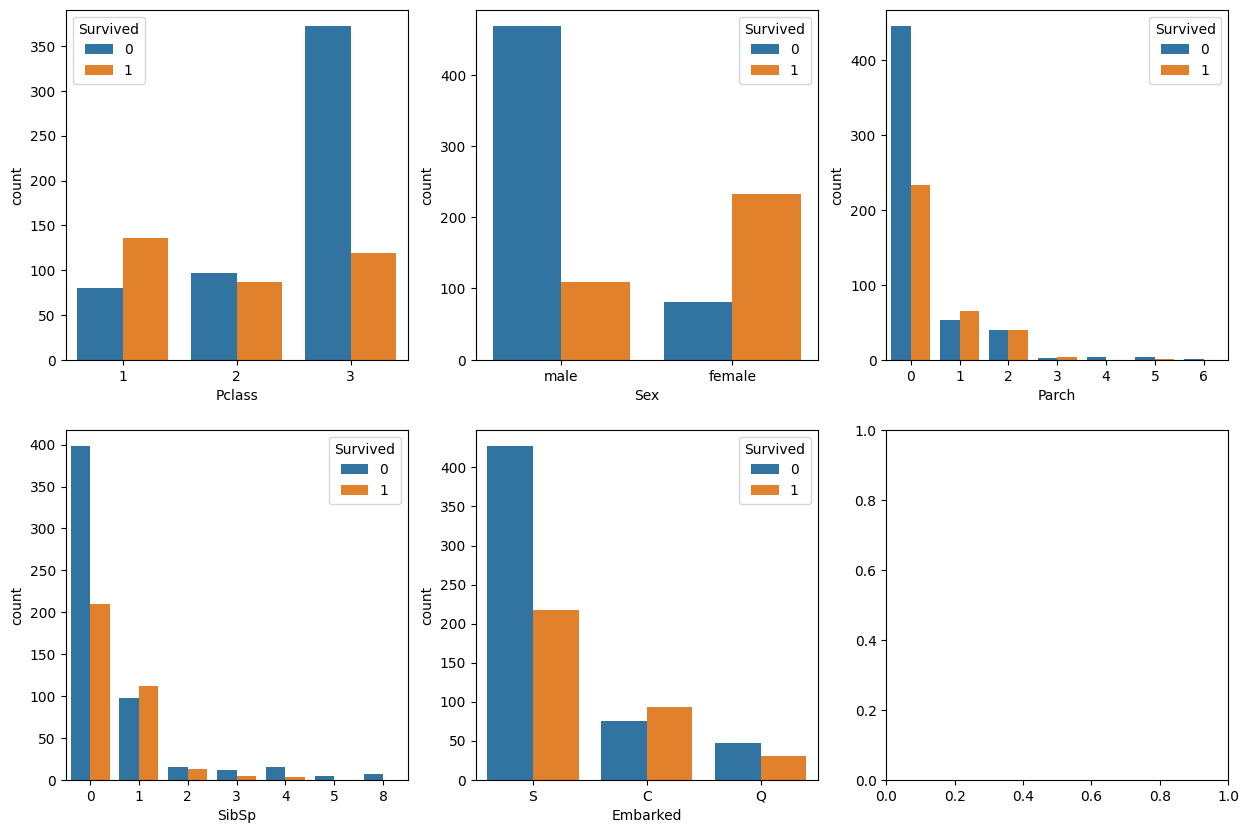

In [6]:
cat_var = ["Pclass", "Sex", "Parch", "SibSp", "Embarked"]
fig, axes = plt.subplots(2, 3, figsize=(15,10))

for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(x=cat, data=df, hue="Survived", ax=ax)

# Pandas Crosstab (Opsional)

In [7]:
pd.crosstab(df.Pclass, df.Survived, normalize="index")

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


# Feature Engineering

### Adding Feature

In [8]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.25,S


In [9]:
df["isAlone"] = (df.SibSp == 0) & (df.Parch == 0)

### Binning

In [10]:
df.Age = pd.cut(df.Age, [0,5,12,18,40,120], labels=["balita", "anak-anak", "remaja", "dewasa", "lansia"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,7.2500,S,False
2,1,1,female,dewasa,1,0,71.2833,C,False
3,1,3,female,dewasa,0,0,7.9250,S,True
4,1,1,female,dewasa,1,0,53.1000,S,False
5,0,3,male,dewasa,0,0,8.0500,S,True


In [11]:
df.Fare = pd.cut(df.Fare, [0,25,100,600], labels=["murah", "mahal", "eksekutif"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,murah,S,False
2,1,1,female,dewasa,1,0,mahal,C,False
3,1,3,female,dewasa,0,0,murah,S,True
4,1,1,female,dewasa,1,0,mahal,S,False
5,0,3,male,dewasa,0,0,murah,S,True


# Data Splitting

In [17]:
X = df.drop(columns="Survived")
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

# Preprocessor

In [12]:
from jcopml.pipeline import num_pipe, cat_pipe

In [13]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,murah,S,False


In [14]:
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(scaling="minmax"), ["SibSp", "Parch"]),
    ("categoric", cat_pipe(), ["Pclass", "Sex", "Age", "Fare", "Embarked", "isAlone"])
])
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])

# Training

In [15]:
from jcopml.tuning import grid_search_params as gsp

In [18]:
model = GridSearchCV(pipeline, gsp.knn_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['SibSp',
                                                                          'Parch']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Age',
                                                                          'Fare',
                                                                          'Embarked',
                                                                          'isAlone'])])),
                                       ('algo', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'algo__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'algo__p': [1, 1.5, 2],
                         'algo__weights': ['uniform', 'distance']},
             verbose=1)

### Evaluation

In [19]:
print(model.best_params_)
print(model.score(X_train, y_train), model.score(X_test, y_test))

{'algo__n_neighbors': 7, 'algo__p': 1.5, 'algo__weights': 'uniform'}
0.8384831460674157 0.7988826815642458


In [20]:
from luwiji.knn import illustration

# Always start with a simple model

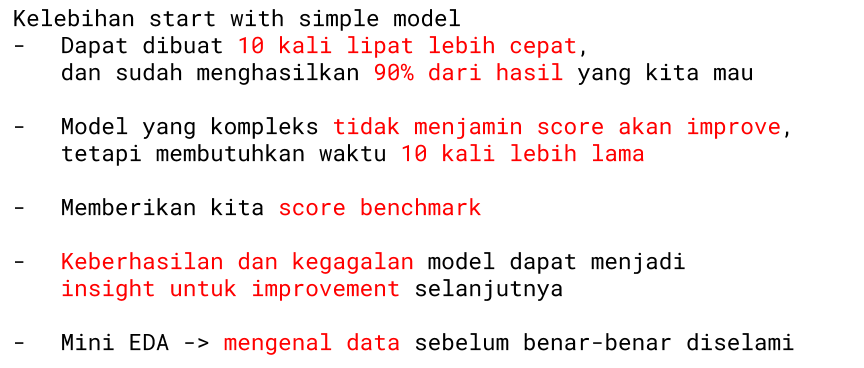

In [21]:
illustration.simple_model_advantage

## Baseline (Batas Bawah)

Model yang paling simple seperti :
- random guessing
- threshold

In [23]:
from sklearn.metrics import accuracy_score

## Random Guessing

In [22]:
random_pred_train = np.random.choice([0,1], size=len(y_train))
random_pred_test = np.random.choice([0,1], size=len(y_test))

In [25]:
train_acc = accuracy_score(y_train, random_pred_train)
test_acc = accuracy_score(y_test, random_pred_test)
print(train_acc, test_acc)

0.48174157303370785 0.5027932960893855


## Threshold

In [26]:
pred_train = X_train.Sex.map({"male": 0, "female":1})
pred_test = X_test.Sex.map({"male": 0, "female":1})

In [27]:
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print(train_acc, test_acc)

0.7879213483146067 0.7821229050279329


# Benchmark (Pembanding)

### Simple Model

Simple Model tanpa EDA ==> 78,7%

### Competition

coba pikirkan, banyak sekali hal yang masih bisa dicoba:

- bagaimana kalau Age tidak kita bin?
- bagaimana kalau kita tidak pakai Emberkad?
- bagaimana kalau kita menggunakan algoritma selain knn?
- bagaimana kalau kita imputate pakai mean bukan median?

karena begitu banyaknya yang bisa dicoba, sistem kompetisi bisa mengumpulkan banyak orang dan model yang berbeda untuk solve suatu masalah yang kemudian model terbaiknya akan diberi reward